In [1]:
import keras

/home/surya/.conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot 

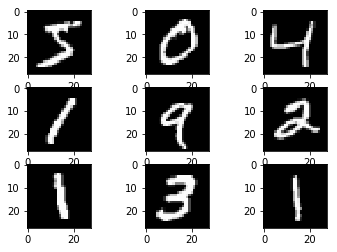

In [3]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [4]:
# Baseline MLP for MNIST dataset
import numpy
import matplotlib.pyplot as plt

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

In [6]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# build the model
model = baseline_model()

In [13]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2783 - acc: 0.9210 - val_loss: 0.1412 - val_acc: 0.9577
Epoch 2/10
 - 8s - loss: 0.1115 - acc: 0.9676 - val_loss: 0.0927 - val_acc: 0.9705
Epoch 3/10
 - 8s - loss: 0.0718 - acc: 0.9795 - val_loss: 0.0782 - val_acc: 0.9770
Epoch 4/10
 - 8s - loss: 0.0503 - acc: 0.9856 - val_loss: 0.0739 - val_acc: 0.9766
Epoch 5/10
 - 8s - loss: 0.0373 - acc: 0.9891 - val_loss: 0.0670 - val_acc: 0.9793
Epoch 6/10
 - 8s - loss: 0.0268 - acc: 0.9927 - val_loss: 0.0623 - val_acc: 0.9811
Epoch 7/10
 - 8s - loss: 0.0211 - acc: 0.9947 - val_loss: 0.0614 - val_acc: 0.9810
Epoch 8/10
 - 8s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0624 - val_acc: 0.9807
Epoch 9/10
 - 8s - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0584 - val_acc: 0.9814
Epoch 10/10
 - 8s - loss: 0.0079 - acc: 0.9986 - val_loss: 0.0573 - val_acc: 0.9821


In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.79%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


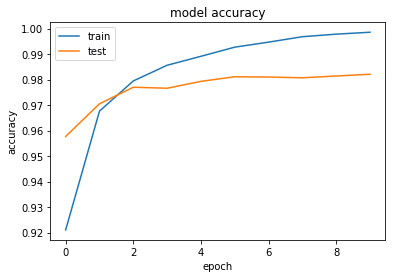

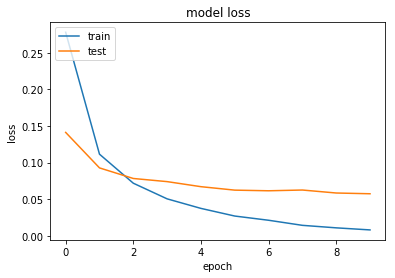

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()